<center><H1>projet Text Mining<H1><center>

In [41]:
import numpy as np
import csv
from facebook_scraper import get_posts
from gensim import corpora , models
import gensim
import nltk
import datetime
from nltk.corpus import stopwords 
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer 
from nltk.corpus import stopwords
import csv
import re 
import pandas as pd
from snowballstemmer import stemmer
import string
nltk.download('stopwords')
nltk.download('punkt')
stopwords_ar=stopwords.words('arabic')
ar_stemmer = stemmer("arabic")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<H1><br><font color = "bleu">Data Pre-processing  </font></H1></center></br>

In [42]:
def pre(documment):
    #stopwords
    #========================================================
    myfile1 = open('stopwordsar (1).txt',encoding = "UTF-8")
    stopwords_ar= myfile1.read()
    #========================================================

    

    #lire le fichier qui contient les postes
    #=======================================================
    text = pd.read_csv(documment,sep='\t',names='a',header=None,encoding = "UTF-8");
    text['index'] = text.index
    #=======================================================
    #netoyage de fichier
    #======================================
    #text = re.sub('[^ء-ي]+',',',text)
    #======================================


    #tokenization
    #=======================================
    a=' '
    tokenized_documents = [[token for token in document.lower().split()] for document in text['a']]
    tokens=[[re.sub('[^ء-ي]+',' ',tex) for tex in dp  ]for dp in tokenized_documents ]
    tokens=[[re.sub(' ' '  ',' ',tex) for tex in dp  ]for dp in tokens ]
    b=[]
    for dp in tokens:
        if a not in dp:
            b.append(dp)
    #======================================
    

    #elimination des stopwords
    #=======================================
    table = str.maketrans('', '', string.punctuation)
    b = [[t.translate(table) for t in w ] for w in b]
    tokens_clean=[[t for t in toke if t not in stopwords_ar ]for toke in b]
    #=======================================



    #stemmer 
    #=======================================
    #words = [[word for word in cle if word.isalpha() ]for cle in tokens_clean]
    #stems=[[ar_stemmer.stemWord(t) for t in word]for word in words]
    #=======================================



    return tokens_clean



In [43]:
l=pre('ANASCHARROUD1.csv')

<H1><br><font color = "bleu">Bag of Words </font></H1></center></br>

In [44]:
id2word = corpora.Dictionary(l)
corpus = [id2word.doc2bow(tok_doc) for tok_doc in l]  

In [45]:
print(id2word)
print(corpus)

Dictionary(809 unique tokens: ['آخر ', 'أفضل', 'تشجيع', 'طريقة', 'لتشجيع']...)
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)], [(7, 1), (8, 1)], [(9, 1), (10, 1), (11, 1), (12, 1)], [(13, 1), (14, 1), (15, 1), (16, 1)], [(17, 1), (18, 1), (19, 1), (20, 1)], [(21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)], [(28, 1)], [(29, 1)], [(30, 1)], [(31, 1)], [(32, 1)], [(33, 1)], [(34, 1)], [(35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)], [(42, 1), (43, 1)], [(44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)], [(51, 1), (52, 1), (53, 1), (54, 1)], [(55, 1)], [(56, 1), (57, 1), (58, 1), (59, 1)], [(60, 1), (61, 1), (62, 1)], [(63, 1), (64, 1), (65, 1), (66, 1)], [(45, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1)], [(81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97

<H1><br><font color = "bleu">Running LDA using Bag of Words  </font></H1></center></br>

In [46]:
lda_model = gensim.models.LdaMulticore(corpus , num_topics=4, id2word=id2word, passes=10,workers=10)

In [47]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.011*" رقي" + 0.011*" اناقه " + 0.011*" تميز" + 0.009*"بالرباط" + 0.009*"ب " + 0.009*"بالدم" + 0.009*"متبرعين" + 0.009*"فصيلة" + 0.009*"بمركز" + 0.009*"التبرع"
Topic: 1 
Words: 0.012*" حسابات تستحق الدعم والمتابعه" + 0.010*"فقدان" + 0.010*"والديهم " + 0.010*"يبكون" + 0.010*"الامان" + 0.010*"اللي" + 0.007*"إنهم" + 0.007*"المنافقون " + 0.007*"الناس" + 0.005*"مش"
Topic: 2 
Words: 0.008*"مشاركة" + 0.008*"الإعلان" + 0.008*"المرجو" + 0.008*"حلاوه" + 0.008*"دماغكم" + 0.008*"الشرق" + 0.008*"ديال" + 0.008*"البروبغندا" + 0.008*"اكرر " + 0.008*"قنوات"
Topic: 3 
Words: 0.016*"نانسي" + 0.016*"اللي" + 0.016*"الشي" + 0.013*"حيغير" + 0.013*"عاشته" + 0.013*"هيدا" + 0.013*"ع " + 0.011*" فخامة" + 0.011*" ذوووق" + 0.011*" ابداااع"


### What is the Dominant topic and its percentage contribution in each document
In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

This way, you will know which document belongs predominantly to which topic.

In [48]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=pre('ANASCHARROUD1.csv'))

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.9059,"حسابات تستحق الدعم والمتابعه, فقدان, والديهم , يبكون, الامان, اللي, إنهم, المنافقون , الناس, مش","[أفضل, طريقة, لتشجيع, نفسك, محاولة, تشجيع, آخر ]"
1,1,3.0,0.7497,"نانسي, اللي, الشي, حيغير, عاشته, هيدا, ع , فخامة, ذوووق, ابداااع","[ مارك, توين]"
2,2,0.0,0.8498,"رقي, اناقه , تميز, بالرباط, ب , بالدم, متبرعين, فصيلة, بمركز, التبرع","[يزعلنى, امتحان, كريتيكال, ويراضي ]"
3,3,3.0,0.8490,"نانسي, اللي, الشي, حيغير, عاشته, هيدا, ع , فخامة, ذوووق, ابداااع","[ظريف, يرد, تهديدات, ترامب]"
4,4,0.0,0.8498,"رقي, اناقه , تميز, بالرباط, ب , بالدم, متبرعين, فصيلة, بمركز, التبرع","[حلو, الحلو, بـ, خصاله ]"
5,5,2.0,0.9062,"مشاركة, الإعلان, المرجو, حلاوه, دماغكم, الشرق, ديال, البروبغندا, اكرر , قنوات","[اكرر , خويو, دماغكم, البروبغندا, ديال, قنوات, الشرق]"
6,6,0.0,0.6249,"رقي, اناقه , تميز, بالرباط, ب , بالدم, متبرعين, فصيلة, بمركز, التبرع",[ تميز]
7,7,0.0,0.6249,"رقي, اناقه , تميز, بالرباط, ب , بالدم, متبرعين, فصيلة, بمركز, التبرع",[ رقي]
8,8,3.0,0.6249,"نانسي, اللي, الشي, حيغير, عاشته, هيدا, ع , فخامة, ذوووق, ابداااع",[ ابداااع]
9,9,3.0,0.6249,"نانسي, اللي, الشي, حيغير, عاشته, هيدا, ع , فخامة, ذوووق, ابداااع",[ ذوووق]


### The most representative sentence for each topic
Sometimes you want to get samples of sentences that most represent a given topic. This code gets the most exemplar sentence for each topic.

In [49]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9603,"رقي, اناقه , تميز, بالرباط, ب , بالدم, متبرعين, فصيلة, بمركز, التبرع","[أردغنة, ليبيا, وإحراق, المنطقة, الوضع, الجزائر, والصحراء, إيران, وأمريكا, ضعف, السعودية, المد, ..."
1,1.0,0.9557,"حسابات تستحق الدعم والمتابعه, فقدان, والديهم , يبكون, الامان, اللي, إنهم, المنافقون , الناس, مش","[ناس, بتلاقي, الامان, وجود, الناس, اللي, بتحبها, جمبها, بتحس, بالامان, تشوفهم, بيفرحوا, بوجودهم,..."
2,2.0,0.9495,"مشاركة, الإعلان, المرجو, حلاوه, دماغكم, الشرق, ديال, البروبغندا, اكرر , قنوات","[صباحكم, تفاؤل , التقيت, بأساتذتي, قليل, عهدنا, عليهم, تضامنوا, وقعوا, عريضة, لاحداث, صندوق, لمر..."
3,3.0,0.9422,"نانسي, اللي, الشي, حيغير, عاشته, هيدا, ع , فخامة, ذوووق, ابداااع","[تجد, إنسان ا, قوي ا, ماض , حافل , بالتجارب , يصل, لمرحلة, العقلانية, يدمر, شيء, داخله ]"


### Frequency Distribution of Word Counts in Documents
When working with a large number of documents, you want to know how big the documents are as a whole and by topic. Let’s plot the document word counts distribution.

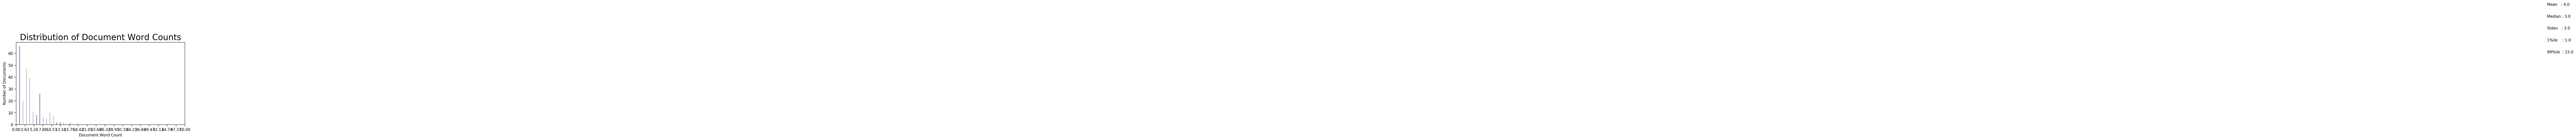

In [50]:
import matplotlib.pyplot as plt
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(8,4), dpi=160)
plt.hist(doc_lens, bins = 300, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 50), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=5)
plt.xticks(np.linspace(0,50,20))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

### Word Counts of Topic Keywords
When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the documents is also interesting to look.

Let’s plot the word counts and the weights of each keyword in the same chart.

You want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight. Often such words turn out to be less important. The chart I’ve drawn below is a result of adding several such words to the stop words list in the beginning and re-running the training process.

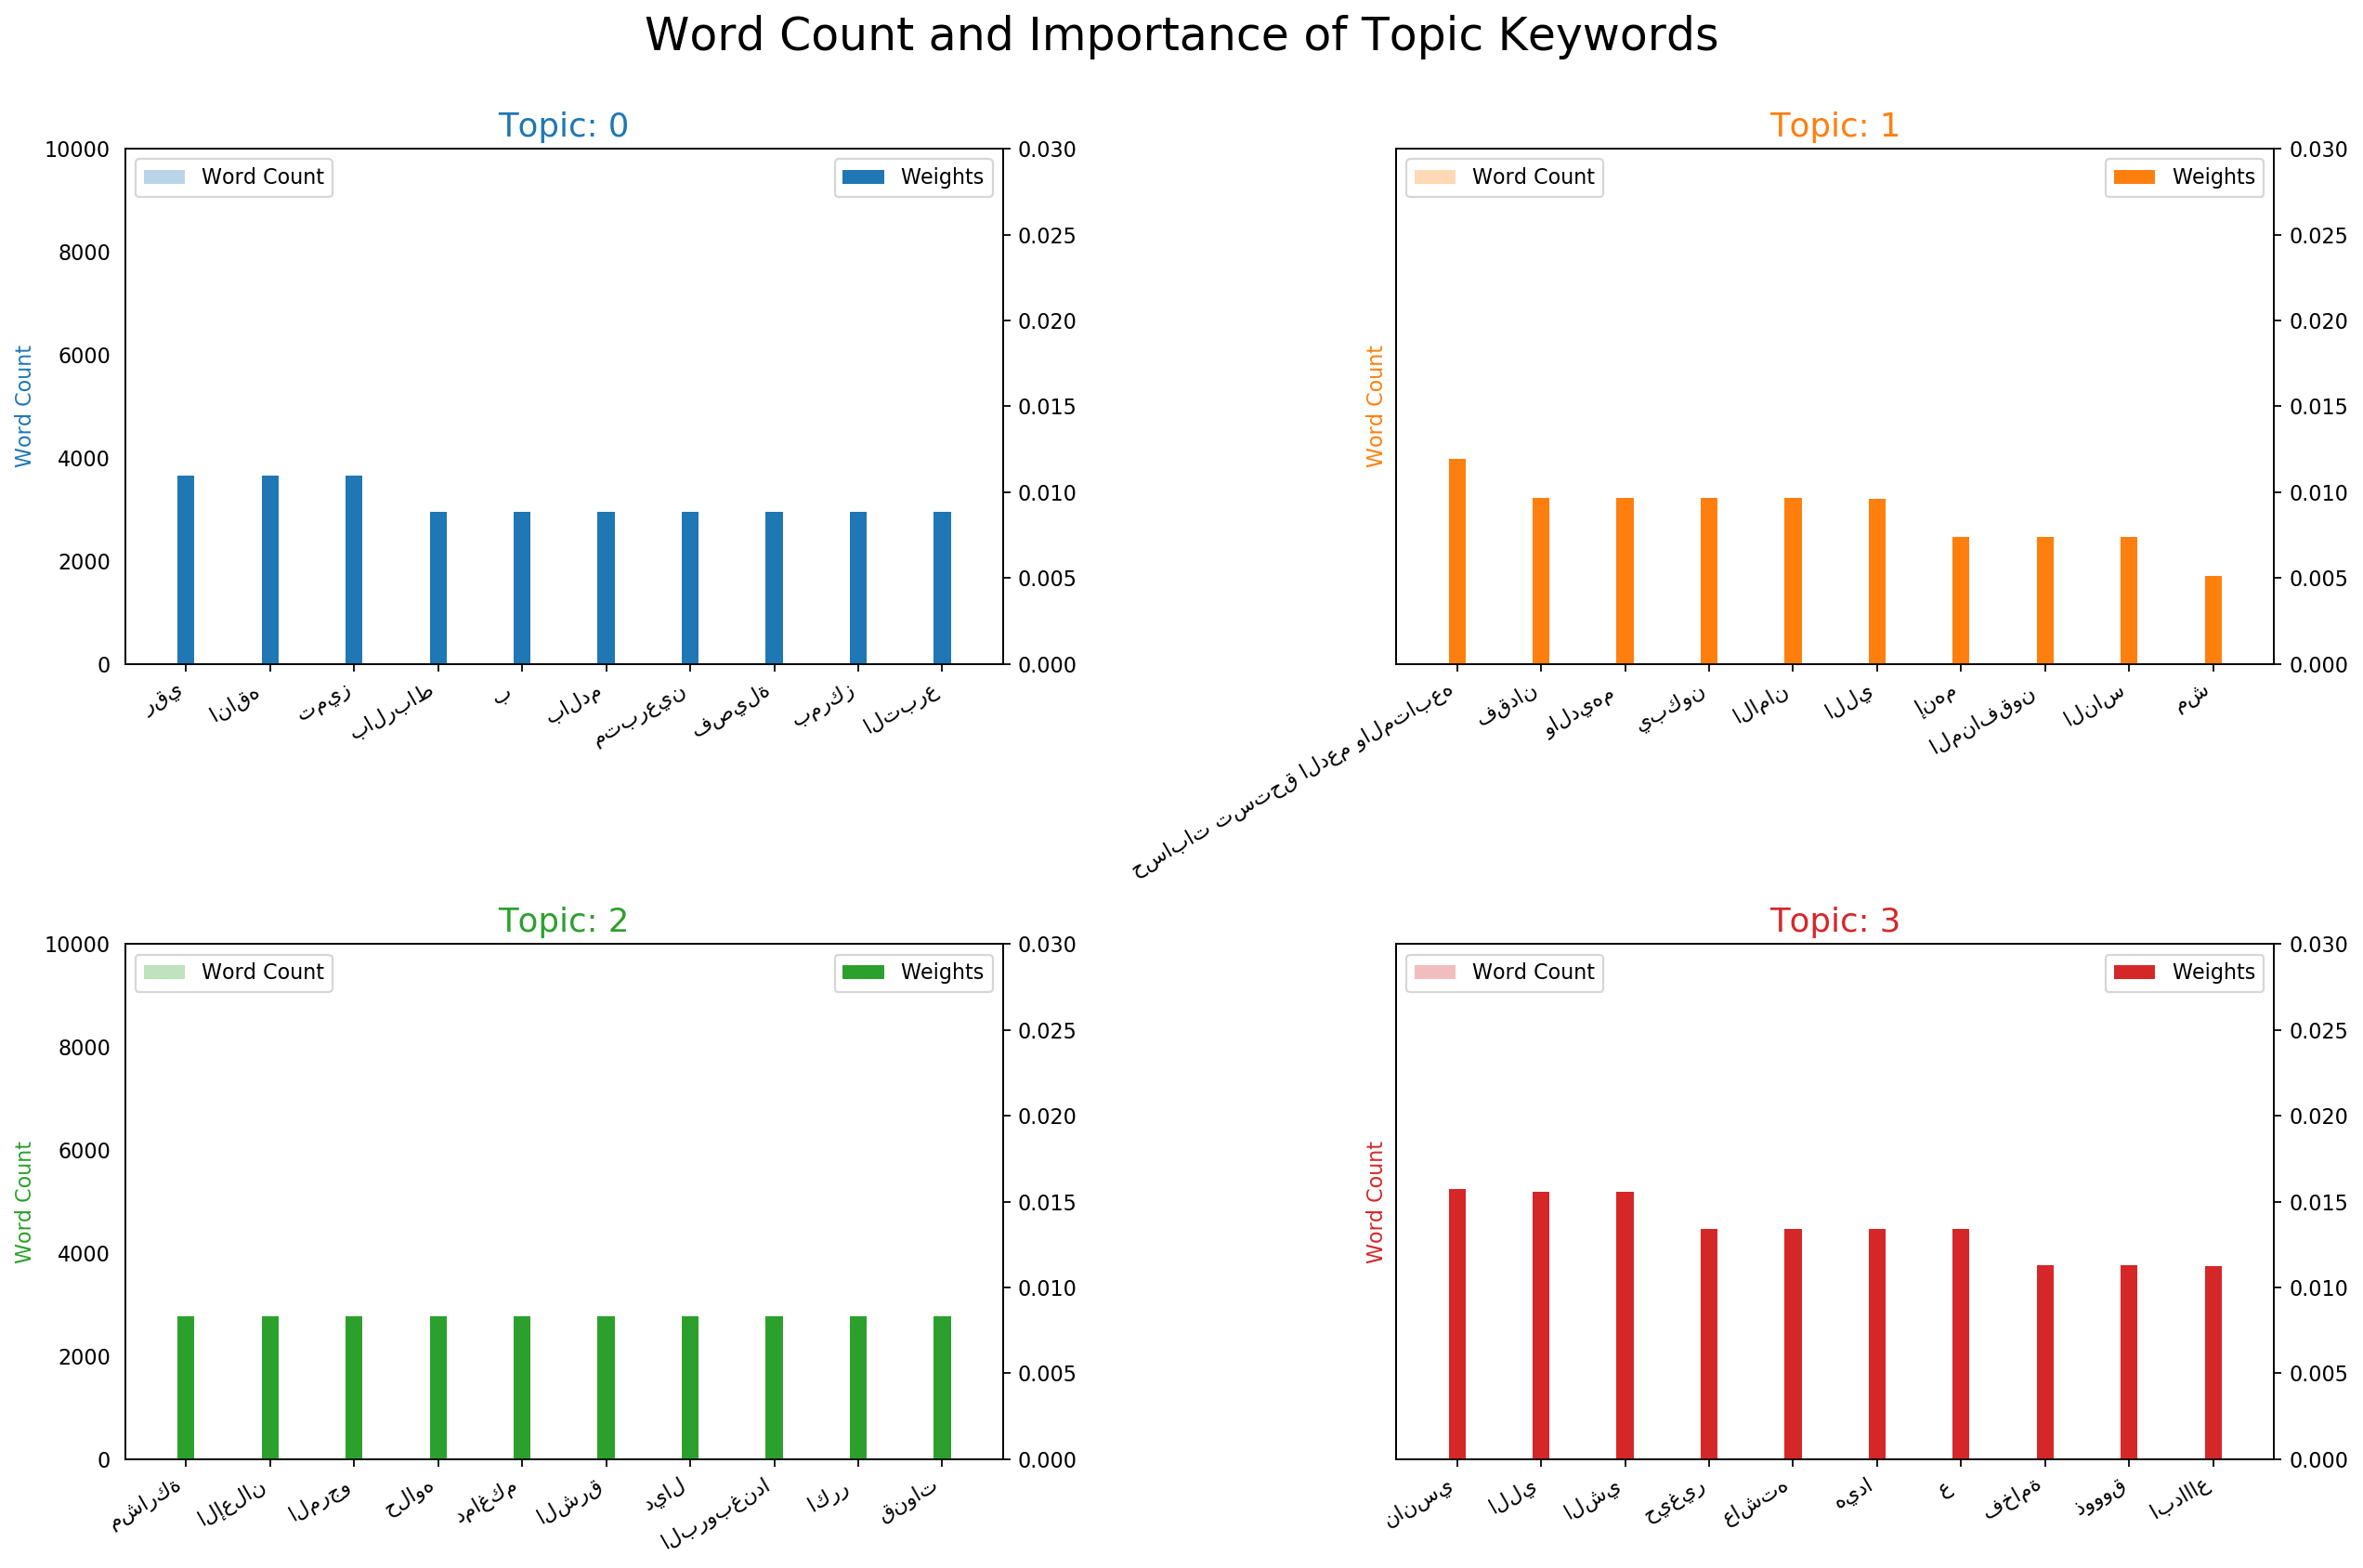

In [52]:
from collections import Counter
import matplotlib.colors as mcolors
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in l for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2,2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 10000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

### What are the most discussed topics in the documents?
Let’s compute the total number of documents attributed to each topic.
Let’s make two plots:

The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
The number of documents for each topic by by summing up the actual weight contribution of each topic to respective documents.


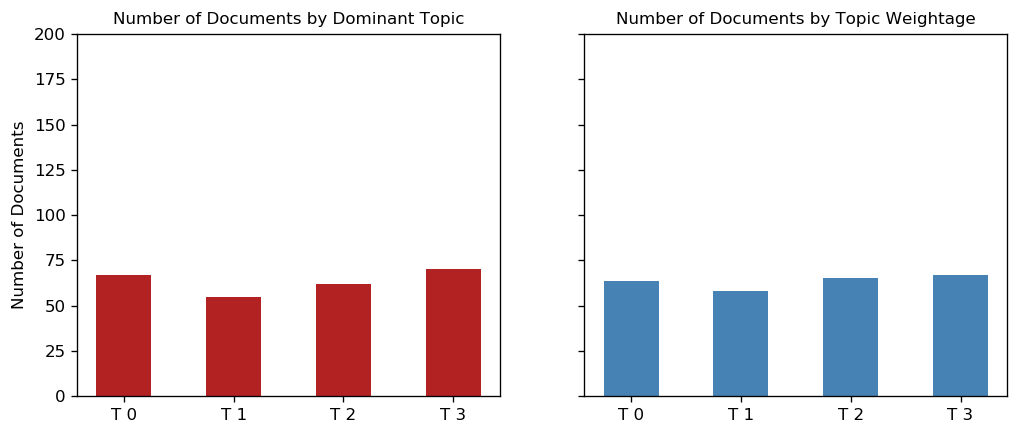

In [54]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start, end):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs= model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus,start=0, end=-1)        

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'T ' + str(x))
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 200)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

### t-SNE Clustering Chart
Let’s visualize the clusters of documents in a 2D space using t-SNE (t-distributed stochastic neighbor embedding) algorithm.

In [55]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []

for row_list in lda_model[corpus]:
    topic_weights.append([w for i, w in row_list])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 10
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 254 samples in 0.001s...
[t-SNE] Computed neighbors for 254 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 254 / 254
[t-SNE] Mean sigma: 0.068551
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.840733
[t-SNE] KL divergence after 1000 iterations: 0.013295


Loading BokehJS ...

### pyLDAVis
Finally, pyLDAVis is the most commonly used and a nice way to visualise the information contained in a topic model. Below is the implementation for LdaModel().

In [56]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

C:\Users\LENOVO\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.065216  0.127568       1        1  28.236076
0      0.129299  0.013237       2        1  25.413355
3     -0.084001 -0.090575       3        1  23.935936
1      0.019918 -0.050231       4        1  22.414625, topic_info=    Category      Freq                           Term     Total  loglift  \
44   Default  4.000000                           الشي  4.000000  30.0000   
45   Default  6.000000                           اللي  6.000000  29.0000   
46   Default  3.000000                          حيغير  3.000000  28.0000   
48   Default  3.000000                          عاشته  3.000000  27.0000   
50   Default  3.000000                           هيدا  3.000000  26.0000   
47   Default  3.000000                             ع   3.000000  25.0000   
49   Default  5.000000                          نانسي  5.000000  24.0000   
34   Default  3.000000   حسابات تستحق الدعم والمتابعه  3.000000  23.0000   
32   Default  3.000000                          فخامة  3.000000  22.0000   
31   Default  3.000000                          ذوووق  3.000000  21.0000   
30   Default  3.000000                        ابداااع  3.000000  20.0000   
29   Default  3.000000                            رقي  3.000000  19.0000   
33   Default  3.000000                         اناقه   3.000000  18.0000   
28   Default  3.000000                           تميز  3.000000  17.0000   
675  Default  2.000000                          فقدان  2.000000  16.0000   
676  Default  2.000000                       والديهم   2.000000  15.0000   
677  Default  2.000000                          يبكون  2.000000  14.0000   
67   Default  2.000000                         الامان  2.000000  13.0000   
137  Default  2.000000                           يعرف  2.000000  12.0000   
138  Default  2.000000                           ينام  2.000000  11.0000   
136  Default  2.000000                          فيها   2.000000  10.0000   
135  Default  2.000000                         الواحد  2.000000   9.0000   
678  Default  2.000000                         إخوتهم  2.000000   8.0000   
679  Default  2.000000                         الإرث   2.000000   7.0000   
680  Default  2.000000                         يحرمون  2.000000   6.0000   
57   Default  2.000000                          بينهم  2.000000   5.0000   
326  Default  2.000000                        بالرباط  2.000000   4.0000   
324  Default  2.000000                             ب   2.000000   3.0000   
325  Default  2.000000                          بالدم  2.000000   2.0000   
329  Default  2.000000                        متبرعين  2.000000   1.0000   
..       ...       ...                            ...       ...      ...   
67    Topic4  2.349051                         الامان  2.784040   1.3256   
684   Topic4  1.796717                           إنهم  2.231055   1.2789   
685   Topic4  1.796688                     المنافقون   2.231056   1.2789   
68    Topic4  1.796534                          الناس  2.231061   1.2788   
61    Topic4  1.243945                            بهم  1.678072   1.1961   
60    Topic4  1.243937                        الدنيا   1.678073   1.1961   
434   Topic4  1.243934                           اهذي  1.678073   1.1961   
436   Topic4  1.243932                           وسرا  1.678073   1.1961   
435   Topic4  1.243929                            بك   1.678072   1.1961   
62    Topic4  1.243925                        يعترفون  1.678073   1.1961   
77    Topic4  1.243763                           كدا   1.678075   1.1960   
73    Topic4  1.243749                        بوجودهم  1.678076   1.1959   
76    Topic4  1.243683                          جمبها  1.678076   1.1959   
71    Topic4  1.243677                           بتحس  1.678076   1.1959   
80    Topic4  1.243661                           وجود  1.678077   1.1959   
75    Topic4  1.243610                         تشوفهم  1.6780

<H1><br><font color = "bleu">Scores  </font></H1></center></br>

In [57]:
for index,score in sorted(lda_model[corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))  


Score: 0.9058947563171387	 
Topic: 0.012*" حسابات تستحق الدعم والمتابعه" + 0.010*"فقدان" + 0.010*"والديهم " + 0.010*"يبكون" + 0.010*"الامان" + 0.010*"اللي" + 0.007*"إنهم" + 0.007*"المنافقون " + 0.007*"الناس" + 0.005*"مش"

Score: 0.031538382172584534	 
Topic: 0.011*" رقي" + 0.011*" اناقه " + 0.011*" تميز" + 0.009*"بالرباط" + 0.009*"ب " + 0.009*"بالدم" + 0.009*"متبرعين" + 0.009*"فصيلة" + 0.009*"بمركز" + 0.009*"التبرع"

Score: 0.03128492087125778	 
Topic: 0.016*"نانسي" + 0.016*"اللي" + 0.016*"الشي" + 0.013*"حيغير" + 0.013*"عاشته" + 0.013*"هيدا" + 0.013*"ع " + 0.011*" فخامة" + 0.011*" ذوووق" + 0.011*" ابداااع"

Score: 0.031281955540180206	 
Topic: 0.008*"مشاركة" + 0.008*"الإعلان" + 0.008*"المرجو" + 0.008*"حلاوه" + 0.008*"دماغكم" + 0.008*"الشرق" + 0.008*"ديال" + 0.008*"البروبغندا" + 0.008*"اكرر " + 0.008*"قنوات"


<H1><br><font color = "bleu">Prediction</font></H1></center></br>

In [58]:
unseen_document = ' تهمة'
tokens_clean1=[t for t in unseen_document if t not in stopwords_ar]
bow_vector = id2word.doc2bow(tokens_clean1)
words1 = [word for word in tokens_clean1 if word.isalpha()]
stemmer =PorterStemmer()
stems1=[stemmer.stem(t) for t in words1 ]
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.25	 Topic: 0.011*" رقي" + 0.011*" اناقه " + 0.011*" تميز" + 0.009*"بالرباط" + 0.009*"ب "
Score: 0.25	 Topic: 0.012*" حسابات تستحق الدعم والمتابعه" + 0.010*"فقدان" + 0.010*"والديهم " + 0.010*"يبكون" + 0.010*"الامان"
Score: 0.25	 Topic: 0.008*"مشاركة" + 0.008*"الإعلان" + 0.008*"المرجو" + 0.008*"حلاوه" + 0.008*"دماغكم"
Score: 0.25	 Topic: 0.016*"نانسي" + 0.016*"اللي" + 0.016*"الشي" + 0.013*"حيغير" + 0.013*"عاشته"
